<a href="https://colab.research.google.com/github/06prakhar06/Hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#Importing Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_data = pd.read_csv('/content/drive/MyDrive/almabetter/Hotel Bookings.csv')
hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
hotel_data.shape

(119390, 32)

#Cleaning Data

In [ ]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_data.isnull().sum().sort_values(ascending=False)
#cheching null values

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:

hotel_data['children'].fillna('0',inplace=True)
hotel_data['country'].fillna('other',inplace=True)
hotel_data.drop(columns=['company','agent'],inplace = True)

In [ ]:
hotel_data.isnull().sum()[:6]

hotel                       0
is_canceled                 0
lead_time                   0
arrival_date_year           0
arrival_date_month          0
arrival_date_week_number    0
dtype: int64

In [ ]:
hotel_data.duplicated().value_counts()

False    87370
True     32020
dtype: int64

In [ ]:
hotel_data.shape

(119390, 30)

In [ ]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


Types hotels are in given data 

In [ ]:
hotel_data["total_guests"] = hotel_data["adults"] + hotel_data["children"].astype(int) + hotel_data["babies"]

In [ ]:
hotel_data["arrival_date"] =hotel_data["arrival_date_year"].astype(str) +"-" + hotel_data["arrival_date_month"] + "-" + hotel_data["arrival_date_day_of_month"].astype(str)
hotel_data["arrival_date"] =pd.to_datetime(hotel_data["arrival_date"])
# hotel_data["arrival_date"]
hotel_data.drop(columns=["arrival_date_week_number"],inplace=True)
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_day_of_month       119390 non-null  int64         
 6   stays_in_weekend_nights         119390 non-null  int64         
 7   stays_in_week_nights            119390 non-null  int64         
 8   adults                          119390 non-null  int64         
 9   children                        119390 non-null  object        
 10  babies                          119390 non-null  int64  

#EDA

##Hotels

In [ ]:
x=hotel_data.groupby('hotel').sum()
hotels = hotel_data.hotel.value_counts()

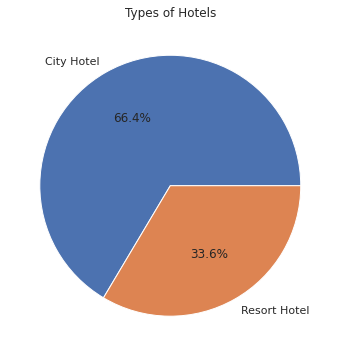

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

In [ ]:
plt.figure(figsize = (12,6)) # controls size of plot
plt.pie(hotels.values,labels=hotels.index,autopct='%1.1f%%' )


plt.title('Types of Hotels')
plt.show()
hotel_data['hotel'].value_counts(normalize=True)

##Monthly Reservation

Text(0, 0.5, ' Monthly Reservation count ')

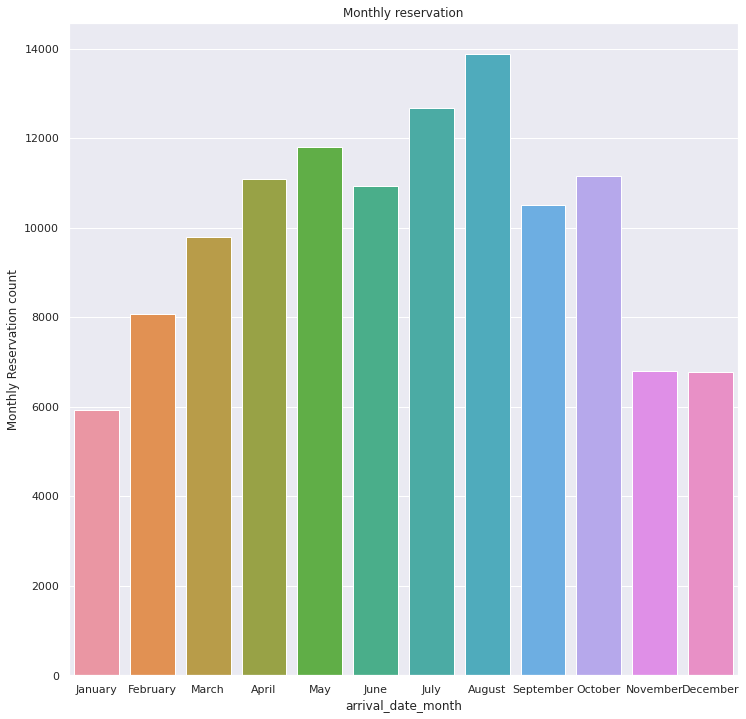

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
graph = sns.countplot(x="arrival_date_month",
                      data=hotel_data,
                      order=["January","February","March","April","May","June","July","August","September","October","November","December"])
graph.set(title="Monthly reservation")
graph.set_ylabel(" Monthly Reservation count ")

In [ ]:
hotel_data.arrival_date_month.value_counts(normalize=True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

##Cancelation and Non-cancelation

growth of reservation in hotels are from spring season i.e from March,gets its peek in the month of August and reservation falls
from the month of September

In [ ]:

cancel = hotel_data.is_canceled.value_counts()
cancel

0    75166
1    44224
Name: is_canceled, dtype: int64

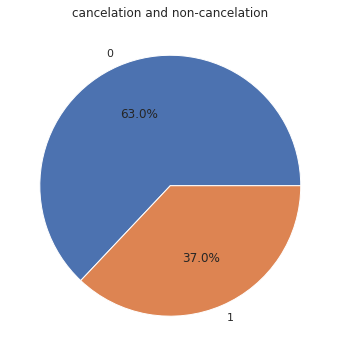

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [ ]:
plt.figure(figsize = (12,6)) # controls size of plot
plt.pie(cancel.values,labels=cancel.index,autopct='%1.1f%%' )


plt.title('cancelation and non-cancelation')
plt.show()
hotel_data['is_canceled'].value_counts(normalize=True)

#Cancelation by hotels

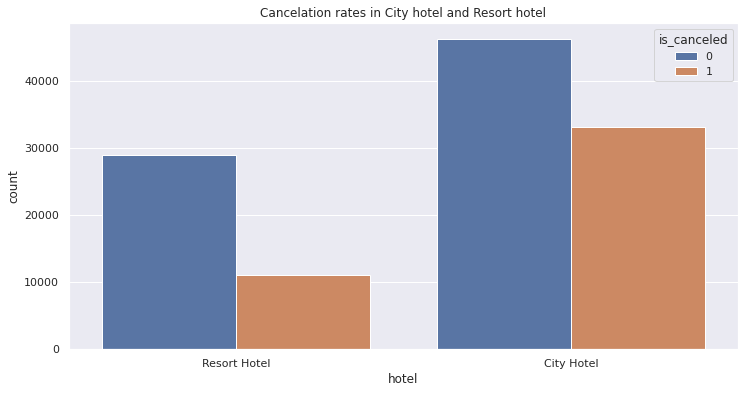

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
dtype: int64

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='hotel',hue="is_canceled", data=hotel_data)
plt.title("Cancelation rates in City hotel and Resort hotel")
plt.show()
hotel_data[['hotel','is_canceled']].value_counts()

##Repeated Guests

In [ ]:
repeated_guest = hotel_data.is_repeated_guest.value_counts()
repeated_guest

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

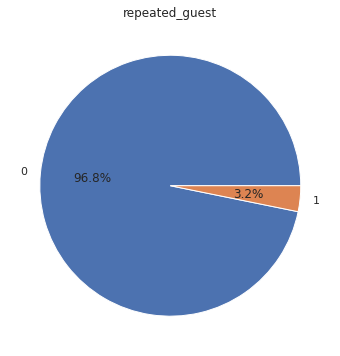

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

In [ ]:

plt.figure(figsize = (12,6)) # controls size of plot
plt.pie(repeated_guest.values,labels=repeated_guest.index,autopct='%1.1f%%' )


plt.title('repeated_guest')
plt.show()
hotel_data['is_repeated_guest'].value_counts(normalize=True)

##Changes made in booking (hotels) 








Text(0, 0.5, 'changes_count_values')

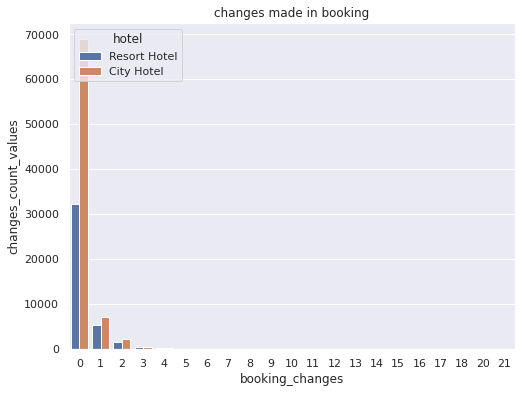

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
graph=sns.countplot(x='booking_changes',hue='hotel',data=hotel_data)
graph.set_title("changes made in booking")
graph.set_ylabel('changes_count_values')

##Disrtibution channel


Text(0, 0.5, 'changes_count_values')

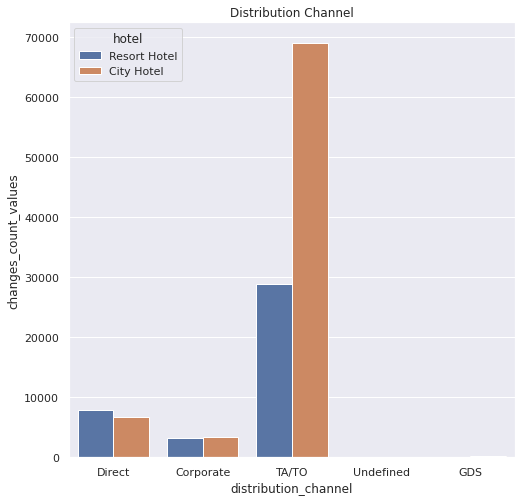

In [ ]:

sns.set(rc={'figure.figsize':(8,8)})
graph=sns.countplot(x='distribution_channel',hue="hotel",data=hotel_data)
graph.set_title("Distribution Channel")
graph.set_ylabel('changes_count_values')

##Parking

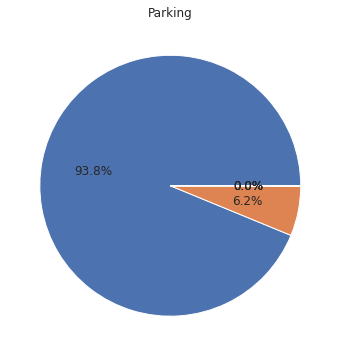

0    0.937884
1    0.061839
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

In [ ]:
required_parking = hotel_data.required_car_parking_spaces.value_counts()

plt.figure(figsize = (12,6)) # controls size of plot
plt.pie(required_parking.values,autopct='%1.1f%%' )


plt.title('Parking')
plt.show()
hotel_data["required_car_parking_spaces"].value_counts(normalize=True)


##Arrival in hotel per year

In [ ]:
hotel_data.arrival_date_year.value_counts()
# hotel_data.info()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

Text(0, 0.5, 'count 0f guest')

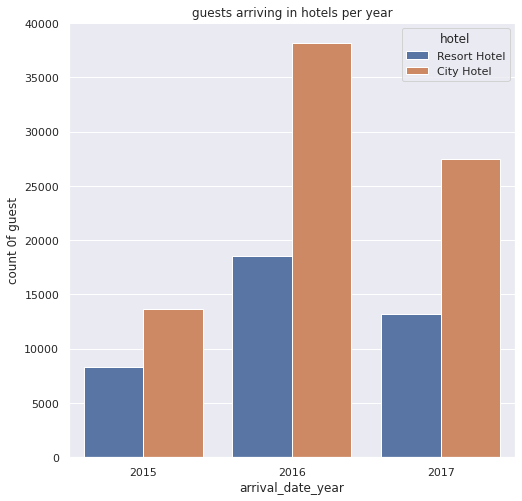

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
graph=sns.countplot(x='arrival_date_year',hue='hotel',data=hotel_data)       

graph.set_title("guests arriving in hotels per year")
graph.set_ylabel('count 0f guest')

##Stays in week nights

Text(0.5, 1.0, 'Number of stays on week nights')

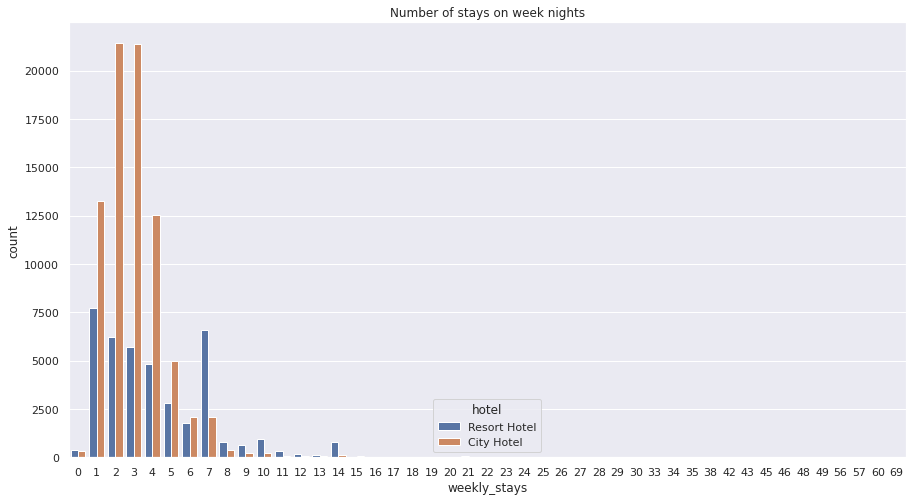

In [ ]:
hotel_data["weekly_stays"] = hotel_data["stays_in_week_nights"] + hotel_data["stays_in_weekend_nights"]

plt.figure(figsize=(15, 8))

sns.countplot(x='weekly_stays',hue='hotel', data=hotel_data)
plt.title("Number of stays on week nights")


Text(0.5, 1.0, 'Types of meals')

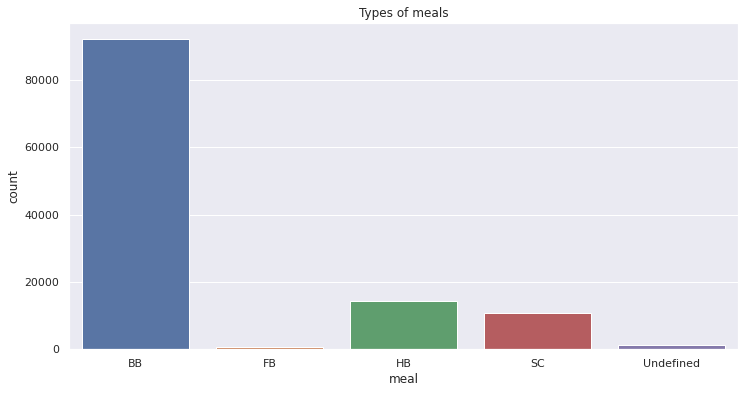

In [ ]:

plt.figure(figsize=(12, 6))

sns.countplot(x='meal', data=hotel_data)
plt.title('Types of meals')

##Most arrivals in top 10 countries

In [ ]:
country_data = hotel_data['country'].value_counts(ascending = False).iloc[0:10]
country_data
hotel_data.country.value_counts(normalize=True)

PRT    0.406986
GBR    0.101591
FRA    0.087235
ESP    0.071765
DEU    0.061035
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 178, dtype: float64

Text(0.5, 0, 'countries')

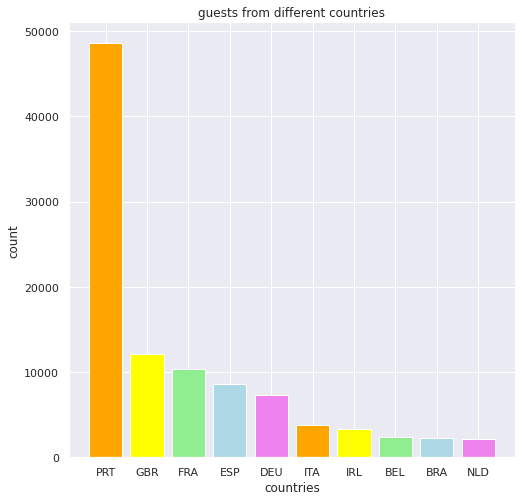

In [ ]:
colors=['orange','yellow','lightgreen','lightblue','violet']

sns.set(rc={'figure.figsize':(8,8)})
graph=plt.bar(x=country_data.index,height=country_data.values,color=colors)       

plt.title("guests from different countries")
plt.ylabel('count')
plt.xlabel('countries')

##Deposite Types 

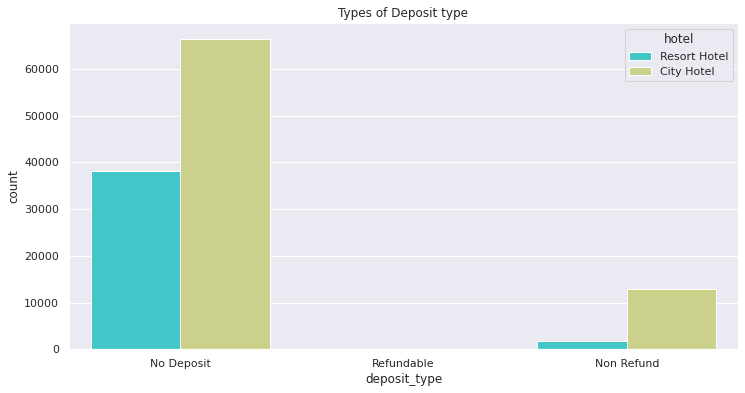

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data = hotel_data, x = 'deposit_type',hue='hotel', palette='rainbow')
plt.title('Types of Deposit type')


plt.show()

In [ ]:
hotel_data[['deposit_type','hotel']].value_counts(normalize=True)

deposit_type  hotel       
No Deposit    City Hotel      0.556512
              Resort Hotel    0.319951
Non Refund    City Hotel      0.107781
              Resort Hotel    0.014398
Refundable    Resort Hotel    0.001189
              City Hotel      0.000168
dtype: float64

##Coustomer Type

In [ ]:
customer_type = hotel_data['customer_type'].value_counts()


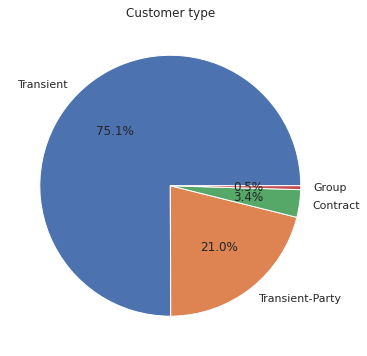

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

In [ ]:
customer_type = hotel_data['customer_type'].value_counts()
plt.figure(figsize = (12,6)) # controls size of plot
plt.pie(customer_type.values,labels=customer_type.index,autopct='%1.1f%%' )


plt.title('Customer type')

plt.show()
hotel_data['customer_type'].value_counts(normalize=True)

##ADR



1. average daily rate =  (SumOfAllLodgingTransaction)/(TotalNumberOfStayingNight)  
2. average daily rate per person =  ADR/(Adults+Children) 
3. We will need to find out average daily rate per person









.
.

##Price Details

In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_day_of_month       119390 non-null  int64         
 6   stays_in_weekend_nights         119390 non-null  int64         
 7   stays_in_week_nights            119390 non-null  int64         
 8   adults                          119390 non-null  int64         
 9   children                        119390 non-null  object        
 10  babies                          119390 non-null  int64  

In [ ]:

hotel_data['is_canceled'] = hotel_data['is_canceled'].astype(str)

actual_guests = hotel_data.loc[hotel_data["is_canceled"] == '0']
actual_guests['price'] = actual_guests['adr'] * ( actual_guests['weekly_stays'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
price_by_months=actual_guests.groupby(['arrival_date_month','hotel'])['price'].mean().reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

price_by_months.arrival_date_month=pd.Categorical(price_by_months.arrival_date_month,categories=months,ordered=True)

price_by_months=price_by_months.sort_values('arrival_date_month')
price_by_months

,arrival_date_month,hotel,price
8,January,City Hotel,234.220488
9,January,Resort Hotel,133.160525
6,February,City Hotel,250.942148
7,February,Resort Hotel,164.061846
15,March,Resort Hotel,215.894454
14,March,City Hotel,269.303084
0,April,City Hotel,341.194912
1,April,Resort Hotel,286.258788
17,May,Resort Hotel,325.676477
16,May,City Hotel,342.787458


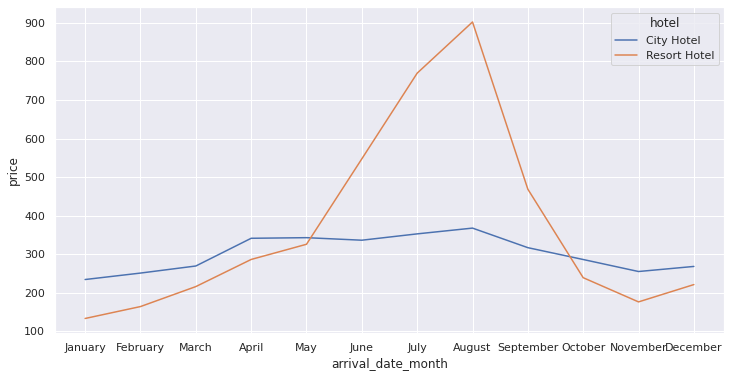

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=price_by_months['arrival_date_month'],y=price_by_months['price'],hue=price_by_months['hotel'])
plt.show()

##Avg arival of guests in diff. hotels in diff.months

In [ ]:
bookings_by_months=hotel_data.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

bookings_by_months['arrival_date_month']=pd.Categorical(bookings_by_months['arrival_date_month'],categories=months,ordered=True)

bookings_by_months=bookings_by_months.sort_values('arrival_date_month')
bookings_by_months

,arrival_date_month,hotel,adr
8,January,City Hotel,82.628986
9,January,Resort Hotel,49.461883
6,February,City Hotel,85.088278
7,February,Resort Hotel,55.171930
15,March,Resort Hotel,57.520147
14,March,City Hotel,92.643116
0,April,City Hotel,111.251838
1,April,Resort Hotel,77.849496
17,May,Resort Hotel,78.758134
16,May,City Hotel,121.638560


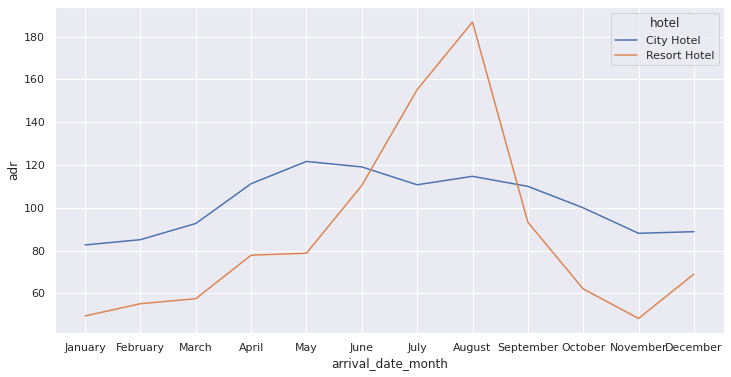

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=bookings_by_months['arrival_date_month'],y=bookings_by_months['adr'],hue=bookings_by_months['hotel'])
plt.show()

Text(0.5, 1.0, 'Waiting time for each hotel type')

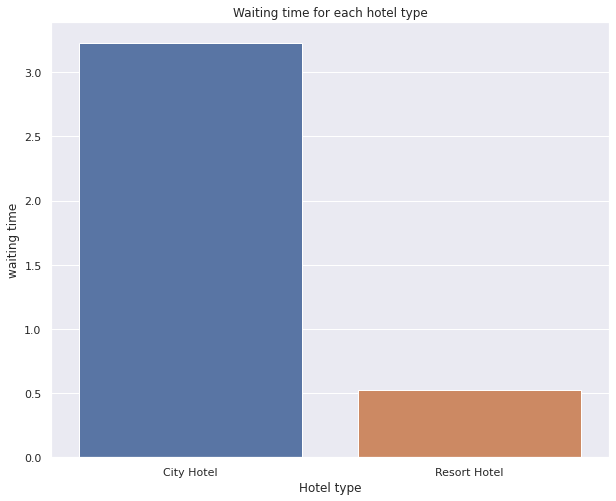

In [ ]:

waiting_time_df=hotel_data.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

plt.figure(figsize=(10,8))

sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

#ADR across distribution channels


Text(0.5, 1.0, 'ADR across Distribution channel')

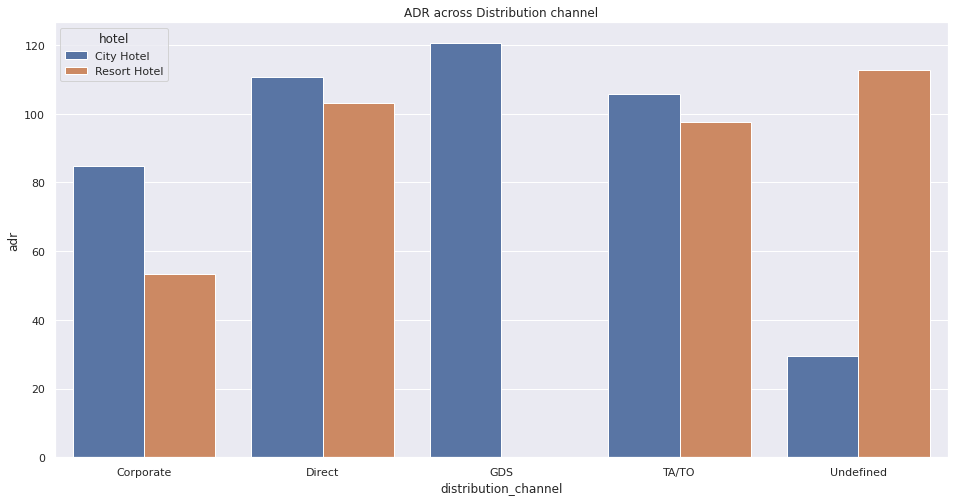

In [ ]:
distribution_channel_df=hotel_data.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

##Correlation b/w variables

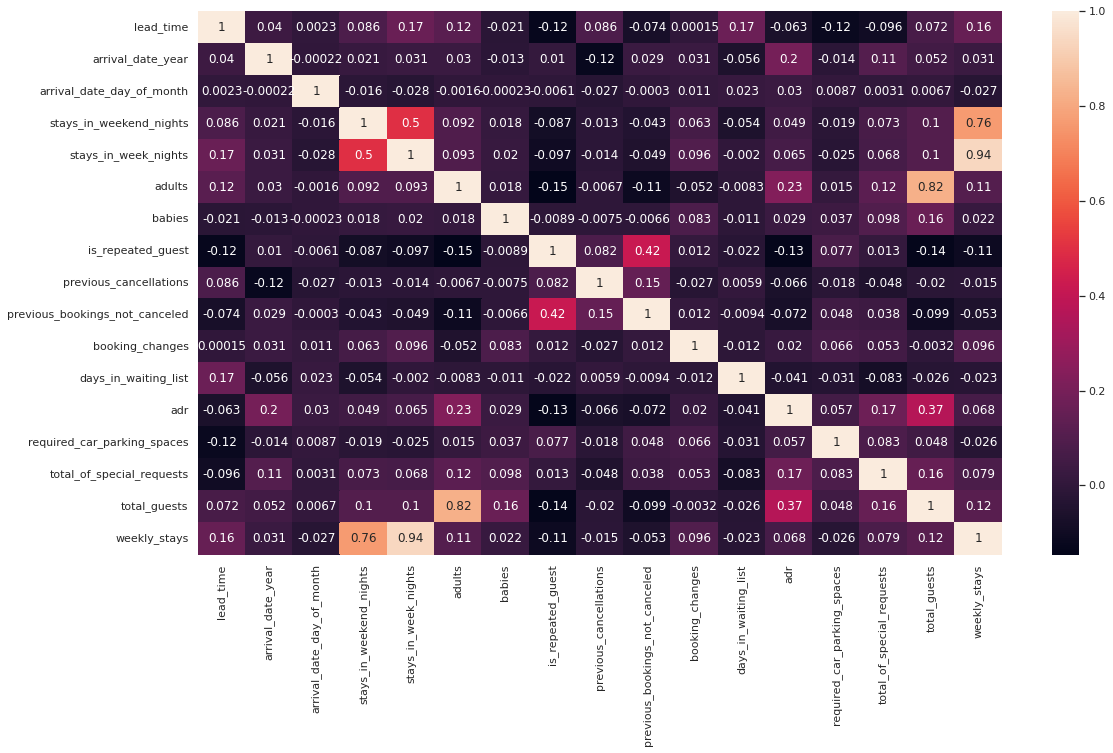

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(hotel_data.corr(),annot=True)

#1) is_canceled and same_room_alloted_or_not are negatively correlated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room.
#2) lead_time and total_stay is positively correlated.That means more is the stay of cutsomer more will be the lead time.
#3)adults,childrens and babies are correlated to each other. That means more the people more will be adr.
#4) is_repeated guest and previous bookings not canceled has strong correlation. may be repeated guests are not more likely to cancel their bookings.